In [6]:
import s3fs
import xarray as xr

In [7]:
bucket_src = "fcx-raw-data-temp"
# bucket_src = os.environ.get('SOURCE_BUCKET_NAME')
path_to_file="CRS/data"
# path_to_file = os.environ.get('PATH_TO_FEGS')
filename = "GOESR_CRS_L1B_20170517_v0.nc"
s3path = f"s3://{bucket_src}/{path_to_file}/{filename}"

In [8]:
s3path

's3://fcx-raw-data-temp/CRS/data/GOESR_CRS_L1B_20170517_v0.nc'

Mount S3 to local dir for direct load in xarray

In [9]:
fs = s3fs.S3FileSystem(anon=True)

In [10]:
fs.ls("fcx-raw-data-temp")

['fcx-raw-data-temp/ABI',
 'fcx-raw-data-temp/AVIRIS',
 'fcx-raw-data-temp/CPL',
 'fcx-raw-data-temp/CRS',
 'fcx-raw-data-temp/FEGS',
 'fcx-raw-data-temp/GLM',
 'fcx-raw-data-temp/ISS_LIS',
 'fcx-raw-data-temp/LIP',
 'fcx-raw-data-temp/LMA',
 'fcx-raw-data-temp/NAV_ER2',
 'fcx-raw-data-temp/S-HIS',
 'fcx-raw-data-temp/S-HIS2']

XARRAY

In [11]:
drop_these = ['gatesp', 'missing', 'incid', 'lat', 'lon',
                    'roll', 'pitch', 'track', 'height', 'head', 'evel', 'nvel',
                    'wvel', 'vacft', 'pwr', 'dop', 'frequency']

with fs.open(s3path, 'rb') as f:
    # DS = xr.load_dataset(f, engine="scipy", drop_variables=['lon', 'lat'])
    DS = xr.load_dataset(f, engine="scipy", drop_variables=drop_these)

print(DS)

<xarray.Dataset>
Dimensions:  (time: 74467, range: 321)
Coordinates:
  * time     (time) timedelta64[ns] 02:28:33.001154400 ... 07:35:23.641778400
  * range    (range) float32 1.012e+03 1.087e+03 1.162e+03 ... 2.492e+04 2.5e+04
Data variables:
    ref      (time, range) float32 -18.91 -21.36 -25.68 -17.94 ... nan nan nan
Attributes:
    year:        Year the data was collected
    date:        Day the data was collected
    title:       Cloud Radar System Data, NASA Goddard Space Flight Center
    filename:    /karlraid1a/heymsfield/GOESR/DIST/HDF/crs/GOESR_CRS_L1B_2017...
    experiment:  NOAA GOES-R
    source:      created from CRS HDF5 file, Version 0.0
    comments:    Contact: gerald.heymsfield@nasa.gov


Dataset key properties

In [12]:
DS.coords

Coordinates:
  * time     (time) timedelta64[ns] 02:28:33.001154400 ... 07:35:23.641778400
  * range    (range) float32 1.012e+03 1.087e+03 1.162e+03 ... 2.492e+04 2.5e+04

In [13]:
DS.data_vars

Data variables:
    ref      (time, range) float32 -18.91 -21.36 -25.68 -17.94 ... nan nan nan

In [14]:
DS.data_vars['ref']

<xarray.DataArray 'ref' (time: 74467, range: 321)>
array([[-18.905445, -21.356792, -25.679296, ...,        nan,        nan,
               nan],
       [-18.790478, -21.483028, -25.762894, ...,        nan,        nan,
               nan],
       [-18.927444, -21.16738 , -25.95508 , ...,        nan,        nan,
               nan],
       ...,
       [-40.323112, -36.766113, -38.658264, ...,        nan,        nan,
               nan],
       [-39.560387, -36.193375, -38.892174, ...,        nan,        nan,
               nan],
       [-38.19471 , -35.49832 , -38.108   , ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * time     (time) timedelta64[ns] 02:28:33.001154400 ... 07:35:23.641778400
  * range    (range) float32 1.012e+03 1.087e+03 1.162e+03 ... 2.492e+04 2.5e+04
Attributes:
    long_name:  Radar Reflectivity
    units:      dBZ

In [15]:
DS.coords

Coordinates:
  * time     (time) timedelta64[ns] 02:28:33.001154400 ... 07:35:23.641778400
  * range    (range) float32 1.012e+03 1.087e+03 1.162e+03 ... 2.492e+04 2.5e+04

In [16]:
DS.coords['time']

<xarray.DataArray 'time' (time: 74467)>
array([ 8913001154400,  8913232040400,  8913208867200, ..., 27323186875199,
       27323413466399, 27323641778400], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 02:28:33.001154400 ... 07:35:23.641778400
Attributes:
    long_name:  time in UTC

In [17]:
DS.coords['range']

<xarray.DataArray 'range' (range: 321)>
array([ 1011.825,  1086.775,  1161.725, ..., 24845.926, 24920.875, 24995.824],
      dtype=float32)
Coordinates:
  * range    (range) float32 1.012e+03 1.087e+03 1.162e+03 ... 2.492e+04 2.5e+04
Attributes:
    long_name:  range from radar
    units:      m

In [18]:
DS.coords['time'][74466]

<xarray.DataArray 'time' ()>
array(27323641778400, dtype='timedelta64[ns]')
Coordinates:
    time     timedelta64[ns] 07:35:23.641778400
Attributes:
    long_name:  time in UTC

EXPERIMENT

In [19]:
DS['ref'].loc["8913001154400":"27323641778400", "1011.825"] # [index, columns]
# get data from ref., along a
# span of time, for a given range

<xarray.DataArray 'ref' (time: 74467)>
array([-18.905445, -18.790478, -18.927444, ..., -40.323112, -39.560387,
       -38.19471 ], dtype=float32)
Coordinates:
  * time     (time) timedelta64[ns] 02:28:33.001154400 ... 07:35:23.641778400
    range    float32 1.012e+03
Attributes:
    long_name:  Radar Reflectivity
    units:      dBZ

In [20]:
pk = DS['ref'].loc["8913001154400", "1011.825":"24995.824"] # [index, columns]
# get data from ref., for a
# time, along a given range
print(pk.shape)
pk

(320,)


<xarray.DataArray 'ref' (range: 320)>
array([-18.905445 , -21.356792 , -25.679296 , -17.936014 , -16.003502 ,
       -23.358727 , -15.727514 , -15.90737  , -19.007486 , -26.44851  ,
       -17.485556 , -17.87297  , -26.79258  , -17.799849 , -23.882748 ,
       -19.966824 , -16.918087 , -24.64971  , -22.669796 , -19.240782 ,
       -22.927818 ,         nan, -20.499233 , -20.034359 ,         nan,
       -23.165726 , -24.887459 , -23.896503 ,         nan, -25.47749  ,
       -23.840984 , -21.280499 ,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       -21.582062 ,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
...
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,  -9.283113 ,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,  -8.3823   ,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,  -7.755562 ,
        -6.360409 ,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan],
      dtype=float32)
Coordinates:
    time     timedelta64[ns] 02:28:33.001154400
  * range    (range) float32 1.012e+03 1.087e+03 ... 2.485e+04 2.492e+04
Attributes:
    long_name:  Radar Reflectivity
    units:      dBZ

In [21]:
DS

<xarray.Dataset>
Dimensions:  (time: 74467, range: 321)
Coordinates:
  * time     (time) timedelta64[ns] 02:28:33.001154400 ... 07:35:23.641778400
  * range    (range) float32 1.012e+03 1.087e+03 1.162e+03 ... 2.492e+04 2.5e+04
Data variables:
    ref      (time, range) float32 -18.91 -21.36 -25.68 -17.94 ... nan nan nan
Attributes:
    year:        Year the data was collected
    date:        Day the data was collected
    title:       Cloud Radar System Data, NASA Goddard Space Flight Center
    filename:    /karlraid1a/heymsfield/GOESR/DIST/HDF/crs/GOESR_CRS_L1B_2017...
    experiment:  NOAA GOES-R
    source:      created from CRS HDF5 file, Version 0.0
    comments:    Contact: gerald.heymsfield@nasa.gov

### Taking ref. data only. Also extracting coordinates data

In [22]:
type(DS['ref'].values)
DS['ref'].values.shape

(74467, 321)

In [23]:
# DS.sel(range=slice("1011.825", "1086.775"))['ref'].values.shape
type(DS['ref'].sel(range='1011.825').values)
DS['ref'].sel(range='1011.825').values.shape
DS['ref'].sel(range='1011.825').values

array([-18.905445, -18.790478, -18.927444, ..., -40.323112, -39.560387,
       -38.19471 ], dtype=float32)

In [24]:
type(DS['time'].values)
DS['time'].values.shape

(74467,)

In [25]:
type(DS['range'].values)
DS['range'].values

array([ 1011.825,  1086.775,  1161.725,  1236.675,  1311.625,  1386.575,
        1461.525,  1536.475,  1611.425,  1686.375,  1761.325,  1836.275,
        1911.225,  1986.175,  2061.125,  2136.075,  2211.025,  2285.975,
        2360.925,  2435.875,  2510.825,  2585.775,  2660.725,  2735.675,
        2810.625,  2885.575,  2960.525,  3035.475,  3110.425,  3185.375,
        3260.325,  3335.275,  3410.225,  3485.175,  3560.125,  3635.075,
        3710.025,  3784.975,  3859.925,  3934.875,  4009.825,  4084.775,
        4159.725,  4234.675,  4309.625,  4384.575,  4459.525,  4534.475,
        4609.425,  4684.375,  4759.325,  4834.275,  4909.225,  4984.175,
        5059.125,  5134.075,  5209.025,  5283.975,  5358.925,  5433.875,
        5508.825,  5583.775,  5658.725,  5733.675,  5808.625,  5883.575,
        5958.525,  6033.475,  6108.425,  6183.375,  6258.325,  6333.275,
        6408.225,  6483.175,  6558.125,  6633.075,  6708.025,  6782.975,
        6857.925,  6932.875,  7007.825,  7082.775, 

Rough: Time manipulation

In [26]:
import numpy as np
print(np.array([8913001154400], dtype='datetime64[ns]')) # last item in time coordinate
print(np.array([27323641778400], dtype='datetime64[ns]')) # 0th item in time coordinate

['1970-01-01T02:28:33.001154400']
['1970-01-01T07:35:23.641778400']


Selecting only needed datacolumns

In [27]:
DS.data_vars['ref'].values.shape

(74467, 321)

ROUGH (Conversion to Dataframe)

In [ ]:
import pandas as pd
pd.DataFrame(DS.data_vars['ref'].values)

In [ ]:
DS['ref']

In [ ]:
DF = DS.to_dataframe()

In [ ]:
DF

In [ ]:
DF[['ref']]

ROUGH. (to demonstrate how dataset is created and its anatomy)

In [ ]:
import numpy as np
import pandas as pd
temp = 15 + 8 * np.random.randn(2, 2, 3)
temp.shape


In [ ]:

precip = 10 * np.random.rand(2, 2, 3)
precip

In [ ]:

lon = [[-99.83, -99.32],
       [-99.79, -99.23]]

lat = [[42.25, 42.21],
       [42.63, 42.59]]
np.array(lat).shape

In [ ]:

# for real use cases, its good practice to supply array attributes such as
# units, but we won't bother here for the sake of brevity
ds = xr.Dataset(
    {
        "temperature": (["x", "y", "time"], temp),
        "precipitation": (["x", "y", "time"], precip),
    },
    coords={
        "lon": (["x", "y"], lon),
        "lat": (["x", "y"], lat),
        "time": pd.date_range("2014-09-06", periods=3),
        "reference_time": pd.Timestamp("2014-09-05"),
    },
)
ds

In [ ]:
ds.data_vars['precipitation']

In [ ]:
precip

In [ ]:
cat = [[42.25, 42.21, 1],
       [42.63, 42.59, 1 ],
       [2,     2,     2]]
np.array(cat).shape 
# this means there are two dimensions, i.e. features VS no of data table. 
# There can be many features and there can be surely many data points for those features

In [ ]:
catss = [[[42.25, 42.21, 1],
        [42.63, 42.59, 1 ],
        [2,     2,     2]],
 
        [[42.25, 42.21, 1],
        [42.63, 42.59, 1 ],
        [2,     2,     2]]]
np.array(catss).shape 
# this means there are three dimensions, i.e. features VS no of data table. And on top of that, test_group(say) 
# There can be many features and there can be surely many data points for those features
# there are many test_groups conducted on various geographical locations, each seperated out say g1 and g2

Numpy array difference

In [ ]:
source = ['a', 'b', 'c', 'dog']
target = ['dog']
np.setdiff1d(source, target)

FOR GRAPH

In [30]:
import json
def start(filename="GOESR_CRS_L1B_20170517_v0.nc", coord_type='time', data_type='ref', param="1011.825"):   
    # use s3fs to mount s3 as fs and load data in xarray
    fs = s3fs.S3FileSystem(anon=False)

    with fs.open(s3path) as crsfile:
        # if okay, proceed to the necessary data
        DS = xr.open_dataset(crsfile, engine="scipy", drop_variables=('gatesp', 'missing', 'incid', 'lat', 'lon',
                'roll', 'pitch', 'track', 'height', 'head', 'evel', 'nvel',
                'wvel', 'vacft', 'pwr', 'dop', 'frequency')) # need to install scipy, a xr dependency to open crs file.

    # preprocess the data, into appropriate format.
    processed_data = {} # format in the form of split oriented json of pandas.
    if (coord_type == 'time'):
        # for a given range, time will be the label, and values will be value of 'ref', accross that range
        processed_data = {
            "columns": [data_type],
            "index": DS['time'].values.tolist(),
            "data": DS['ref'].sel(range=param).values.tolist() # accross all the date time, get values of data_type, for a given range
            # "data": json.dumps(DS['ref'].loc["8913001154400":"27323641778400", param].values.tolist())
        }
    elif (coord_type == 'range'):
        # for a given time, range will be the label, and values will be value of 'ref', accross that time
        processed_data = {
            "columns": [data_type],
            "index": DS['range'].values.tolist(),
            "data": DS['ref'].sel(time=param).values.tolist() # accross all the range, get values of data_type, for a given date-time
            # "data": json.dumps(DS['ref'].loc[param, "1011.825":"24995.824"].values.tolist()) 
        }
    # return the processed data for render, in JSON api specification format.
    return json.dumps(processed_data)

In [31]:
prd = start()

In [35]:
prdj = json.loads(prd)
prdj.keys()

dict_keys(['columns', 'index', 'data'])

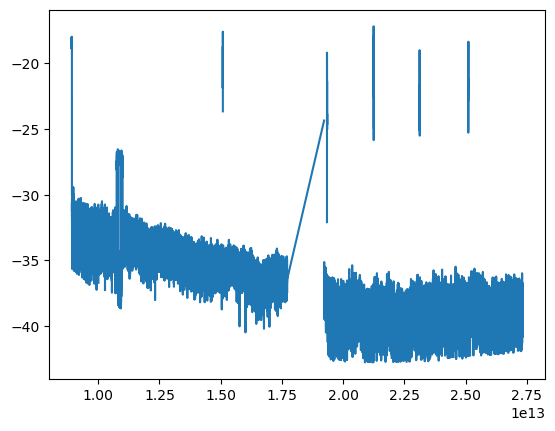

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(prdj['index'], prdj['data'])
plt.show()